In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
#Load csv
df=pd.read_csv('COVID19_tests.csv')

df.head()


,Country,Date,Tested,Units,Positive,Positive/Tested %,Source_1,Source_2,FileDate
0,Afghanistan,31 May,38460.0,samples,15205.0,39.5,https://moph-dw.gov.af/dhis-web-dashboard/#/,,13-July-2020
1,Albania,9 June,16716.0,samples,1299.0,7.8,https://new.shëndetësia.gov.al/9-qershor-2020-...,,13-July-2020
2,Algeria,20 June,22467.0,samples,11631.0,51.8,https://africacdc.org/covid-19/,,13-July-2020
3,Argentina,28 June,329036.0,samples,55343.0,17.1,https://www.argentina.gob.ar/coronavirus/infor...,,13-July-2020
4,Armenia,24 May,50397.0,NaN,6661.0,13.2,https://ncdc.am/coronavirus/confirmed-cases-by...,,13-July-2020


In [34]:
df["Units"].value_counts()

Units
cases      586
samples    293
Name: count, dtype: int64

In [35]:
df.shape

(1721, 9)

In [36]:
df.isna().sum()

Country                0
Date                   0
Tested                 2
Units                842
Positive               5
Positive/Tested %      7
Source_1               0
Source_2               0
FileDate             352
dtype: int64

In [37]:
df["Positive"]=df["Positive"].fillna(df["Positive"].mean())
df["Positive/Tested %"] = df["Positive/Tested %"].fillna(df["Positive/Tested %"].mean())
df["Tested"]=df["Tested"].fillna(df["Tested"].mean())
df["Units"]=df["Units"].fillna(df["Units"].mode()[0])



In [38]:
df.head()

,Country,Date,Tested,Units,Positive,Positive/Tested %,Source_1,Source_2,FileDate
0,Afghanistan,31 May,38460.0,samples,15205.0,39.5,https://moph-dw.gov.af/dhis-web-dashboard/#/,,13-July-2020
1,Albania,9 June,16716.0,samples,1299.0,7.8,https://new.shëndetësia.gov.al/9-qershor-2020-...,,13-July-2020
2,Algeria,20 June,22467.0,samples,11631.0,51.8,https://africacdc.org/covid-19/,,13-July-2020
3,Argentina,28 June,329036.0,samples,55343.0,17.1,https://www.argentina.gob.ar/coronavirus/infor...,,13-July-2020
4,Armenia,24 May,50397.0,cases,6661.0,13.2,https://ncdc.am/coronavirus/confirmed-cases-by...,,13-July-2020


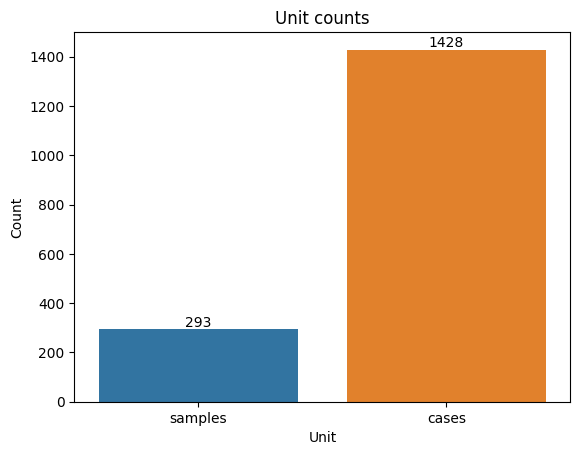

In [39]:
graph = sns.countplot(x="Units", data=df, hue='Units')
plt.title("Unit counts")
plt.xlabel("Unit")
plt.ylabel("Count")

for container in graph.containers:
    graph.bar_label(container)

plt.show()

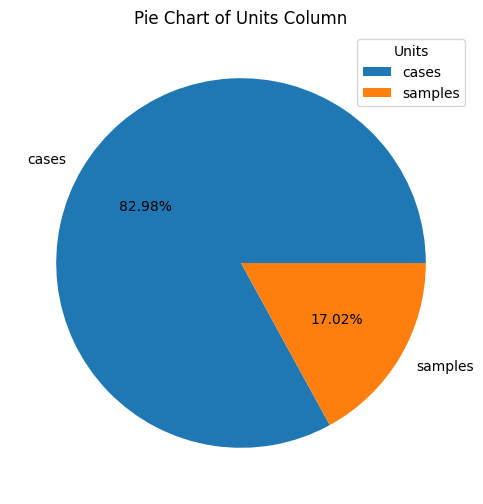

In [41]:
category_counts=df["Units"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%.2f%%')
plt.title('Pie Chart of Units Column')

plt.legend(labels=category_counts.index, title="Units", loc="upper right")
plt.show()



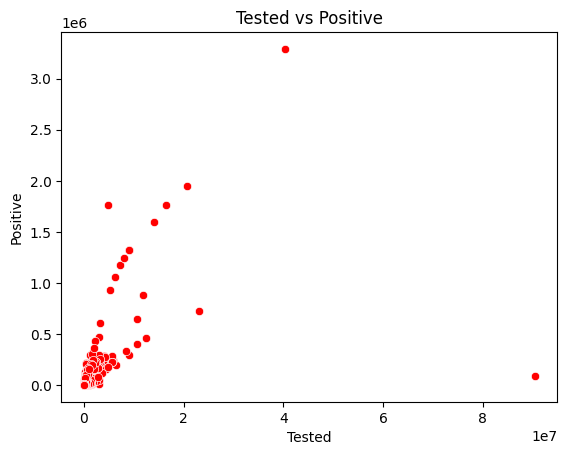

In [42]:
sns.scatterplot(data=df, x="Tested", y="Positive", color="red")
plt.title('Tested vs Positive')
plt.xlabel('Tested')
plt.ylabel('Positive')
plt.show()

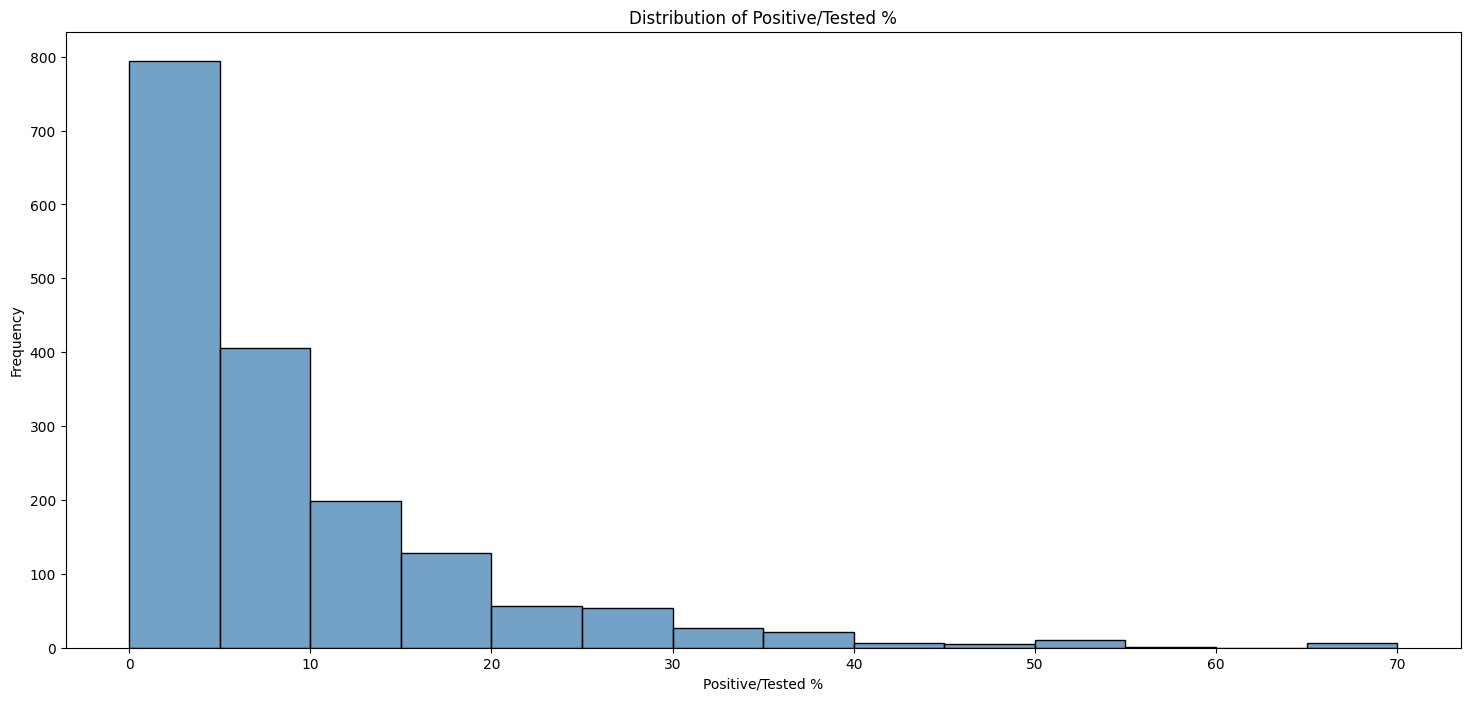

In [45]:
plt.figure(figsize=(18,8))

sns.histplot(df['Positive/Tested %'], bins = np.arange(df['Positive/Tested %'].min(),df['Positive/Tested %'].max(),5), color = 'steelblue', edgecolor = 'black', kde=False)
plt.title('Distribution of Positive/Tested %')
plt.xlabel('Positive/Tested %')
plt.ylabel('Frequency')
plt.show()

In [44]:
df.describe()

,Tested,Positive,Positive/Tested %
count,1.721000e+03,1.721000e+03,1721.000000
mean,4.558650e+05,3.246887e+04,9.145426
std,2.724492e+06,1.472534e+05,10.599200
min,1.800000e+01,0.000000e+00,0.000000
25%,1.830300e+04,7.140000e+02,2.200000
50%,6.789500e+04,2.854000e+03,5.830000
75%,2.258890e+05,1.442300e+04,11.780000
max,9.041000e+07,3.292329e+06,73.620000
